# **Weather Prediction**
### Group Number : 07
### EG/2020/3956 - Hariharasakthy N.
### EG/2020/4119 - Praveenan J.


In [757]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [758]:
#Read the data file using pandas
data=pd.read_csv('Weather_Data.csv')

#Display top 5 data in the dataset
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [759]:
#(Row ,Column)
data.shape

(8784, 8)

In [760]:
#To display  column names of the dataset
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [761]:
#To display the data types of the all features & label
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

**Data Visualizations**

In [762]:
# Drop the column Date/Time
data.drop(columns=['Date/Time'],axis=1,inplace=True)

In [763]:
#Describe the datasets
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


** Preprocessing For Decision Tree**

In [764]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# data["Weather"]=le.fit_transform(data["Weather"])

In [765]:
x=data.iloc[:,:-1]
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [766]:
y=data.iloc[:,-1]
y

0                        Fog
1                        Fog
2       Freezing Drizzle,Fog
3       Freezing Drizzle,Fog
4                        Fog
                ...         
8779                    Snow
8780                    Snow
8781                    Snow
8782                    Snow
8783                    Snow
Name: Weather, Length: 8784, dtype: object

In [767]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(x,y)

In [768]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[0.38188277, 0.46502836, 0.82926829, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.46880907, 0.84146341, 0.04819277, 0.16216216,
        0.60685155],
       [0.38188277, 0.47448015, 0.86585366, 0.08433735, 0.07900208,
        0.61011419],
       ...,
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827],
       [0.77975133, 0.89035917, 0.85365854, 0.22891566, 0.0956341 ,
        0.41761827]])

In [769]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.3,random_state=4)

In [770]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=10)
dt.fit(X_train,y_train)
y_pred3=dt.predict(X_test)
y_pred3

array(['Thunderstorms,Rain,Fog', 'Freezing Rain,Fog', 'Drizzle', ...,
       'Freezing Drizzle,Haze', 'Haze', 'Freezing Rain,Snow Grains'],
      dtype=object)

In [771]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred3))

                                         precision    recall  f1-score   support

                                  Clear       0.39      0.67      0.49       611
                                 Cloudy       0.35      0.16      0.22       606
                                Drizzle       0.75      0.91      0.82       608
                            Drizzle,Fog       0.64      0.92      0.75       642
                Drizzle,Ice Pellets,Fog       1.00      1.00      1.00       662
                           Drizzle,Snow       1.00      1.00      1.00       621
                       Drizzle,Snow,Fog       1.00      1.00      1.00       599
                                    Fog       0.93      0.53      0.68       668
                       Freezing Drizzle       0.78      1.00      0.88       603
                   Freezing Drizzle,Fog       0.94      1.00      0.97       614
                  Freezing Drizzle,Haze       1.00      1.00      1.00       604
                  Freezing 

In [772]:
#Counting the occurrences of each unique value in the 'Weather' column
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [773]:
#Return number of unique elements in weather column
filtered_data=data
filtered_data.Weather.nunique()

50

**Converting the Weather Categories into Standard Categories**

In [774]:
from itertools import chain  # from itertools library import chain function


In [775]:
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(',')]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'

In [776]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [777]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [778]:
Get_Weather(Create_list(x))

'RAIN+FOG'

In [779]:
filtered_data['Std_Weather']=filtered_data['Weather'].apply(lambda x:Get_Weather(Create_list(x)))

In [780]:
filtered_data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [781]:
filtered_data.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

**Sample selection and Data balancing**

In [782]:
cloudy_df=filtered_data[filtered_data['Std_Weather']=='Cloudy'].sample(600)

In [783]:
clear_df=filtered_data[filtered_data['Std_Weather']=='Clear'].sample(600)

In [784]:
rain_df=filtered_data[filtered_data['Std_Weather']=='RAIN']
snow_df=filtered_data[filtered_data['Std_Weather']=='SNOW']
snow_df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
41,-2.1,-9.5,57,22,25.0,99.66,Snow Showers,SNOW
44,-5.6,-13.4,54,24,25.0,100.07,Snow Showers,SNOW
45,-5.8,-12.8,58,26,25.0,100.15,Snow Showers,SNOW
47,-7.4,-14.1,59,17,19.3,100.27,Snow Showers,SNOW
48,-9.0,-16.0,57,28,25.0,100.35,Snow Showers,SNOW
...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13,Snow,SNOW
8780,0.2,-2.4,83,24,9.7,100.03,Snow,SNOW
8781,-0.5,-1.5,93,28,4.8,99.95,Snow,SNOW
8782,-0.2,-1.8,89,28,9.7,99.91,Snow,SNOW


**Creating New Weather Dataset**

In [785]:
weather_df=pd.concat([cloudy_df,clear_df,rain_df,snow_df],axis=0)
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
2279,3.6,-4.6,55,19,25.0,100.24,Mostly Cloudy,Cloudy
3447,21.6,13.5,60,0,24.1,101.16,Mostly Cloudy,Cloudy
7160,5.2,1.5,77,22,48.3,101.94,Mostly Cloudy,Cloudy
1486,0.2,-4.2,72,13,25.0,100.49,Cloudy,Cloudy
4188,25.1,9.8,38,13,48.3,100.85,Mostly Cloudy,Cloudy


In [786]:
weather_df.shape

(2359, 8)

In [787]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

In [788]:
weather_df.drop(columns=['Weather'],axis=1,inplace=True)

In [789]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2279,3.6,-4.6,55,19,25.0,100.24,Cloudy
3447,21.6,13.5,60,0,24.1,101.16,Cloudy
7160,5.2,1.5,77,22,48.3,101.94,Cloudy
1486,0.2,-4.2,72,13,25.0,100.49,Cloudy
4188,25.1,9.8,38,13,48.3,100.85,Cloudy


**Duplicate Records**

In [790]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


**Null/Missing Values**

In [791]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [792]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

**Correlation among the features**

In [793]:
cols=['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']

In [794]:
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.940552,-0.261110,-0.128954,0.395742,-0.102444
Dew Point Temp_C,0.940552,1.000000,0.075863,-0.121394,0.187916,-0.214876
Rel Hum_%,-0.261110,0.075863,1.000000,0.036368,-0.653530,-0.333785
Wind Speed_km/h,-0.128954,-0.121394,0.036368,1.000000,-0.132715,-0.399652
Visibility_km,0.395742,0.187916,-0.653530,-0.132715,1.000000,0.330345
Press_kPa,-0.102444,-0.214876,-0.333785,-0.399652,0.330345,1.000000


**Heat map**

<Axes: >

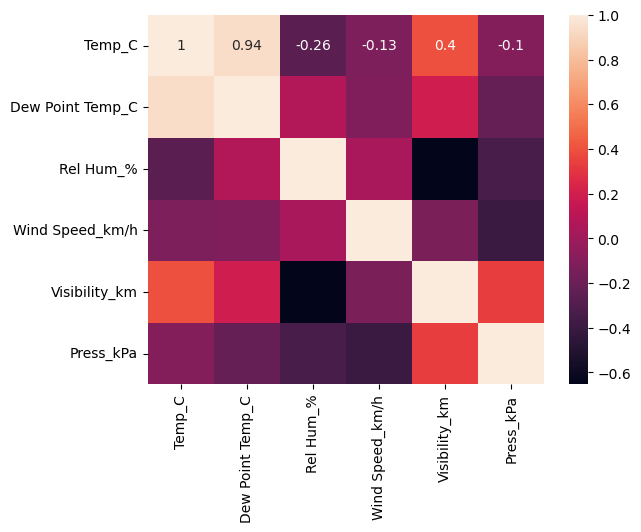

In [795]:
sns.heatmap(cor_matrix,annot=True)

In [796]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

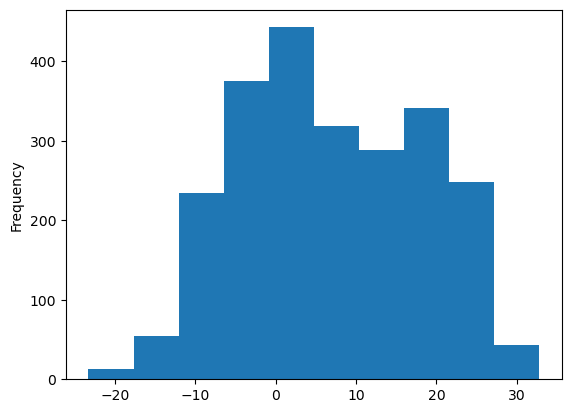

In [797]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

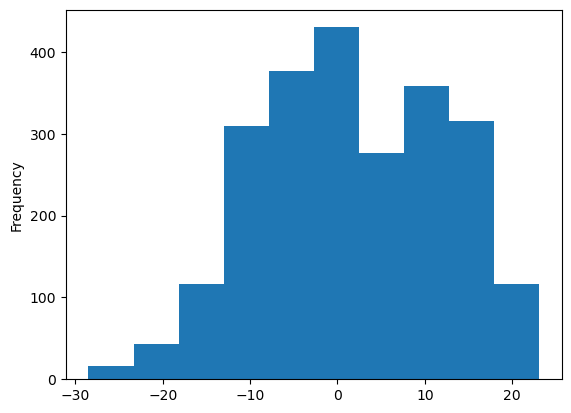

In [798]:
weather_df['Dew Point Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

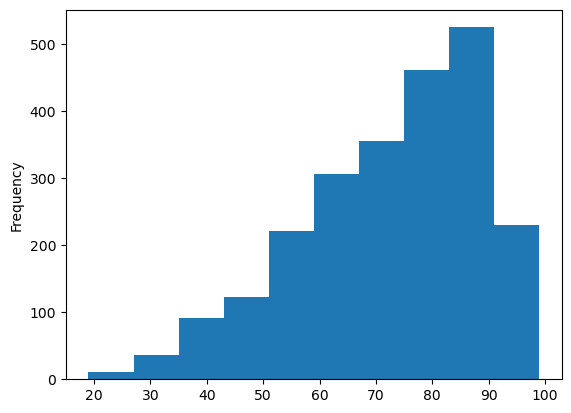

In [799]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

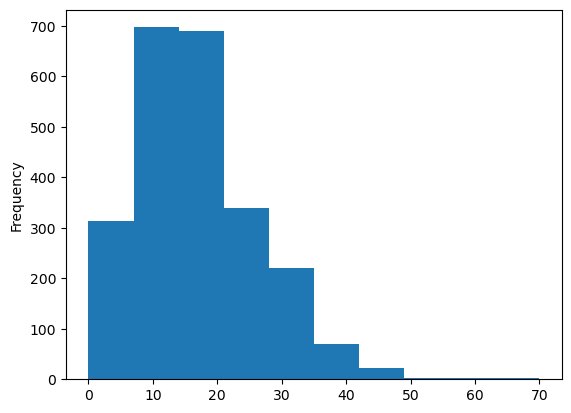

In [800]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

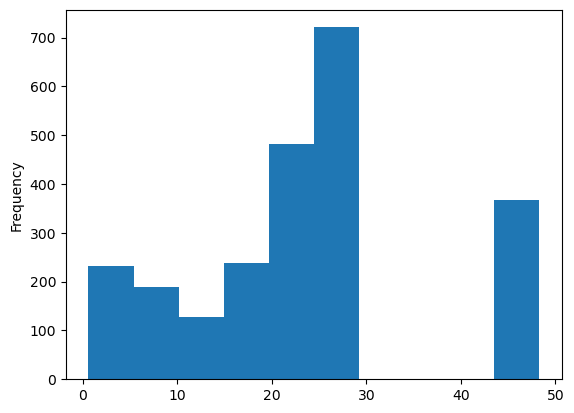

In [801]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: ylabel='Frequency'>

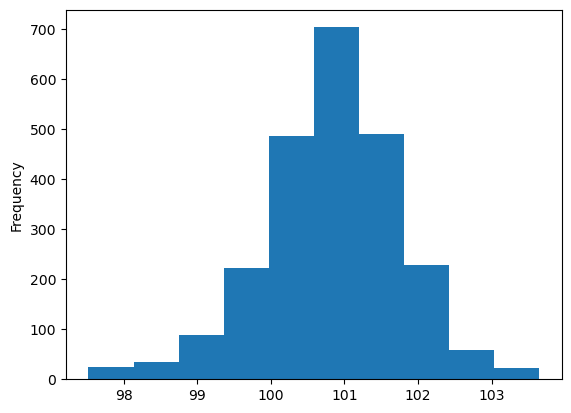

In [802]:
weather_df['Press_kPa'].plot(kind='hist')

<Axes: >

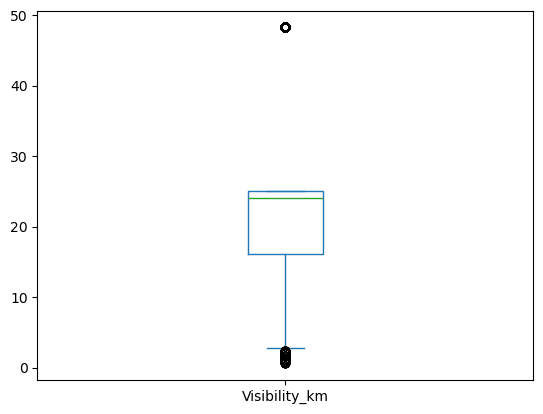

In [803]:
weather_df['Visibility_km'].plot(kind='box')

In [804]:
#IQR
q1=weather_df['Visibility_km'].quantile(0.25)
q3=weather_df['Visibility_km'].quantile(0.75)
iqr=q3-q1


In [805]:
q1,q3,iqr

(16.1, 25.0, 8.899999999999999)

In [806]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit


(2.7500000000000036, 38.349999999999994)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


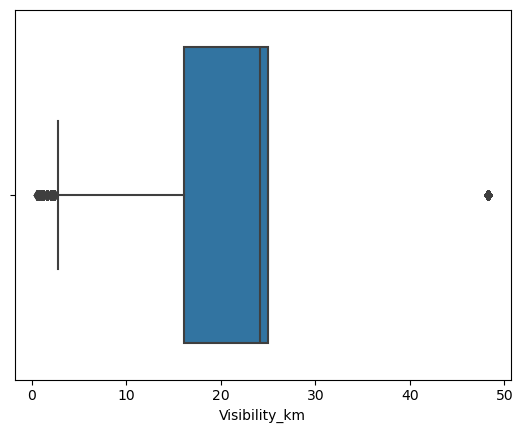

In [807]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Visibility_km' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [808]:
weather_df.loc[(weather_df['Visibility_km']>upper_limit) |(weather_df['Visibility_km']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
7160,5.2,1.5,77,22,48.3,101.94,Cloudy
4188,25.1,9.8,38,13,48.3,100.85,Cloudy
2098,2.3,-3.3,66,11,48.3,99.94,Cloudy
5288,21.1,17.5,80,0,48.3,101.12,Cloudy
1950,13.7,9.0,73,15,48.3,101.57,Cloudy
...,...,...,...,...,...,...,...
8728,-8.5,-9.9,90,24,1.2,100.49,SNOW
8729,-9.0,-10.4,90,19,2.4,100.46,SNOW
8734,-10.1,-11.6,89,15,2.4,100.20,SNOW
8737,-9.4,-10.5,92,9,2.4,100.22,SNOW


In [809]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Visibility_km']<upper_limit) &(weather_df['Visibility_km']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 1878
 outliers: 481


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


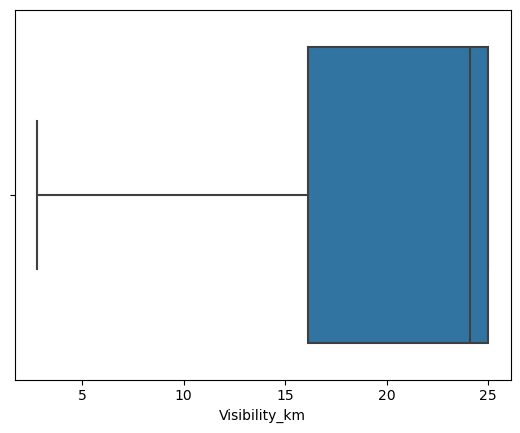

In [810]:
if 'Visibility_km' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [811]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Visibility_km']>upper_limit),'Visibility_km']=upper_limit
new_weather_df.loc[(new_weather_df['Visibility_km']<lower_limit),'Visibility_km']=lower_limit


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


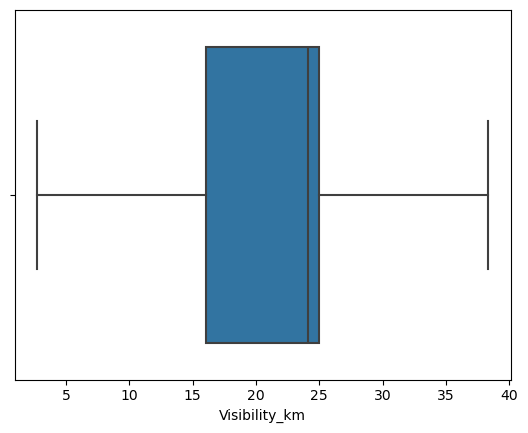

In [812]:
if 'Visibility_km' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Visibility_km'])
else:
    print("Column 'Visibility_km' not found in the DataFrame.")

In [813]:
#IQR
q1=weather_df['Temp_C'].quantile(0.25)
q3=weather_df['Temp_C'].quantile(0.75)
iqr=q3-q1

In [814]:
q1,q3,iqr

(-2.9, 16.6, 19.5)

In [815]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-32.15, 45.85)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


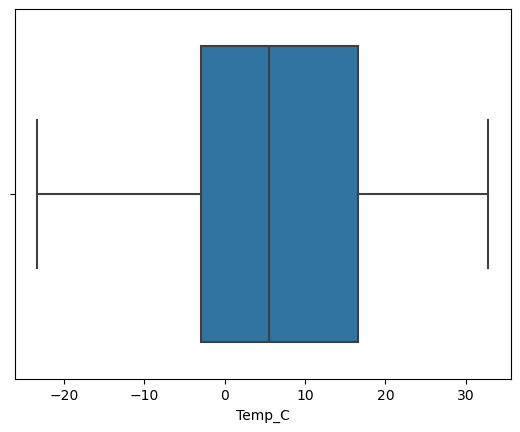

In [816]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Temp_C' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Temp_C'])
else:
    print("Column 'Temp_C' not found in the DataFrame.")

In [817]:
weather_df.loc[(weather_df['Temp_C']>upper_limit) |(weather_df['Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [818]:
#IQR
q1=weather_df['Dew Point Temp_C'].quantile(0.25)
q3=weather_df['Dew Point Temp_C'].quantile(0.75)
iqr=q3-q1


In [819]:
q1,q3,iqr

(-6.7, 10.4, 17.1)

In [820]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-32.35, 36.050000000000004)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


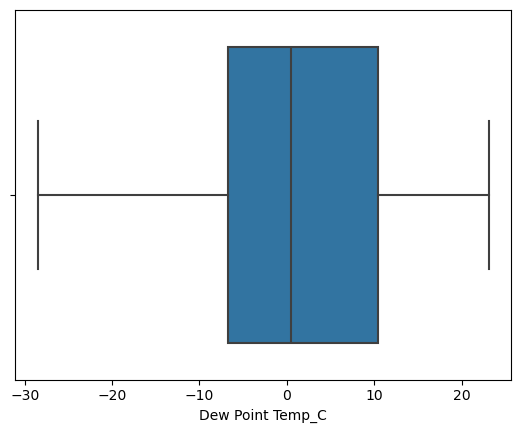

In [821]:
#sns.boxplot(weather_df['Visibility_km'])
if 'Dew Point Temp_C' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Dew Point Temp_C'])
else:
    print("Column 'Dew Point Temp_C' not found in the DataFrame.")

In [822]:
weather_df.loc[(weather_df['Dew Point Temp_C']>upper_limit) |(weather_df['Dew Point Temp_C']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [823]:
#IQR
q1=weather_df['Rel Hum_%'].quantile(0.25)
q3=weather_df['Rel Hum_%'].quantile(0.75)
iqr=q3-q1

In [824]:
q1,q3,iqr

(62.0, 85.0, 23.0)

In [825]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(27.5, 119.5)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


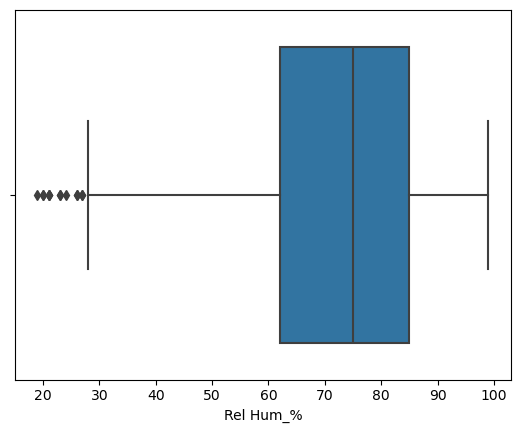

In [826]:
#sns.boxplot(weather_df['Rel Hum_%'])
if 'Rel Hum_%' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [827]:
weather_df.loc[(weather_df['Rel Hum_%']>upper_limit) |(weather_df['Rel Hum_%']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
3067,19.9,-4.0,20,11,48.3,100.93,Cloudy
1986,13.4,-5.8,26,13,48.3,101.64,Cloudy
1982,16.6,-6.8,19,15,48.3,101.66,Cloudy
3063,20.6,-2.3,21,7,48.3,101.25,Cloudy
3159,17.1,-1.8,27,26,48.3,100.76,Clear
3069,18.7,-4.1,21,15,25.0,100.87,Clear
2224,7.9,-12.0,23,28,48.3,100.59,Clear
2078,1.7,-18.4,21,13,48.3,102.06,Clear
2874,8.1,-11.9,23,28,48.3,101.77,Clear
3062,20.1,-3.6,20,19,48.3,101.36,Clear


In [828]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Rel Hum_%']<upper_limit) &(weather_df['Rel Hum_%']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))


before removing outliers: 2359
after removing outliers: 2346
 outliers: 13


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


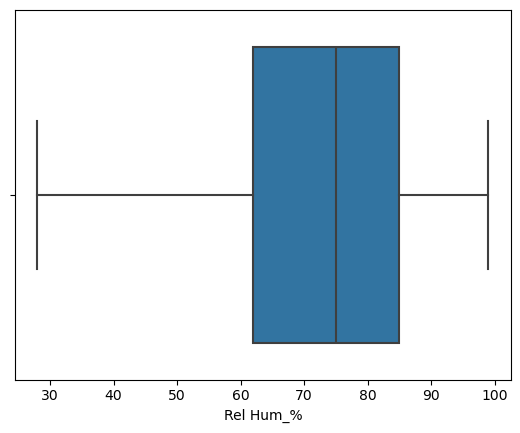

In [829]:
if 'Rel Hum_%' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [830]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Rel Hum_%']>upper_limit),'Rel Hum_%']=upper_limit
new_weather_df.loc[(new_weather_df['Rel Hum_%']<lower_limit),'Rel Hum_%']=lower_limit

C:\Users\DELL\AppData\Local\Temp\ipykernel_11648\198354359.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '119.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_weather_df.loc[(new_weather_df['Rel Hum_%']>upper_limit),'Rel Hum_%']=upper_limit


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


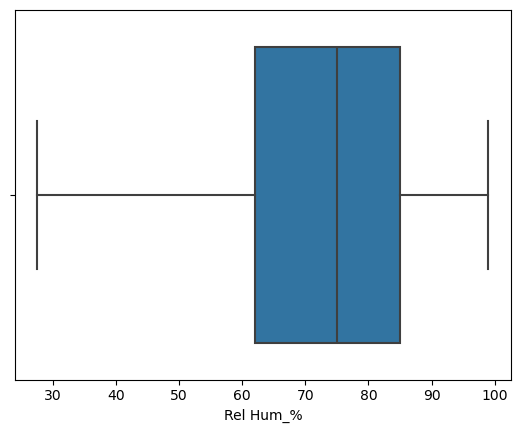

In [831]:
if 'Rel Hum_%' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Rel Hum_%'])
else:
    print("Column 'Rel Hum_%' not found in the DataFrame.")

In [832]:
#IQR
q1=weather_df['Wind Speed_km/h'].quantile(0.25)
q3=weather_df['Wind Speed_km/h'].quantile(0.75)
iqr=q3-q1

In [833]:
q1,q3,iqr

(9.0, 22.0, 13.0)

In [834]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-10.5, 41.5)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


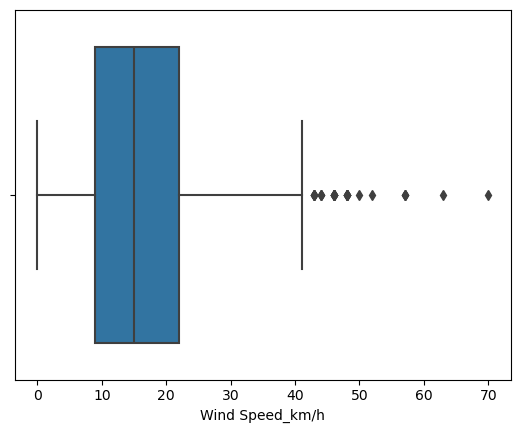

In [835]:
if 'Wind Speed_km/h' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [836]:
weather_df.loc[(weather_df['Wind Speed_km/h']>upper_limit) |(weather_df['Wind Speed_km/h']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2730,5.9,2.8,80,43,24.1,98.66,Cloudy
411,-3.5,-8.2,70,57,25.0,99.00,Cloudy
1501,5.8,-4.0,49,50,48.3,98.73,Cloudy
1503,5.3,-5.6,45,57,24.1,98.67,Cloudy
7269,14.0,9.7,75,48,25.0,99.46,Cloudy
410,0.5,-4.0,72,70,25.0,98.62,Cloudy
7265,14.2,9.4,73,48,24.1,99.94,Cloudy
675,-0.2,-6.0,65,43,25.0,100.34,Clear
677,-1.5,-7.8,62,43,25.0,100.59,Clear
1504,5.0,-5.0,48,63,48.3,98.67,Clear


In [837]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Wind Speed_km/h']<upper_limit) &(weather_df['Wind Speed_km/h']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2329
 outliers: 30


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


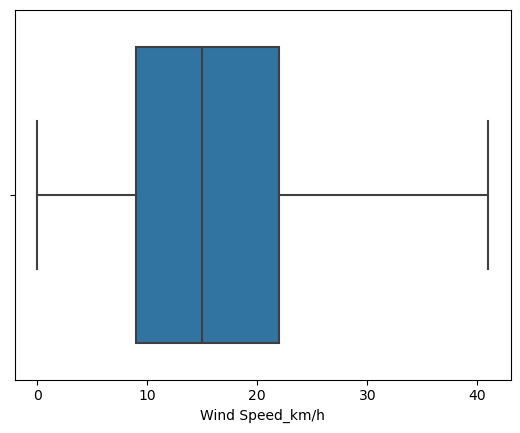

In [838]:

if 'Wind Speed_km/h' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [839]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']>upper_limit),'Wind Speed_km/h']=upper_limit
new_weather_df.loc[(new_weather_df['Wind Speed_km/h']<lower_limit),'Wind Speed_km/h']=lower_limit

C:\Users\DELL\AppData\Local\Temp\ipykernel_11648\3419545952.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '41.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_weather_df.loc[(new_weather_df['Wind Speed_km/h']>upper_limit),'Wind Speed_km/h']=upper_limit


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


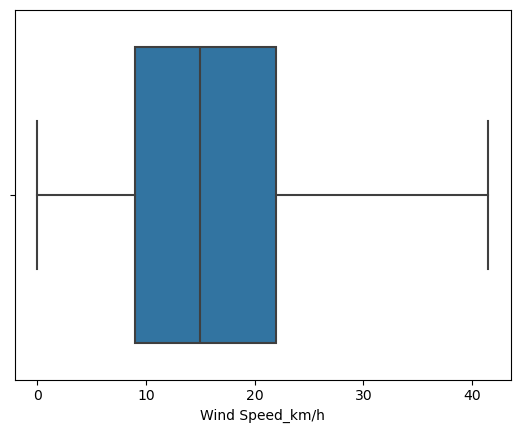

In [840]:

if 'Wind Speed_km/h' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Wind Speed_km/h'])
else:
    print("Column 'Wind Speed_km/h' not found in the DataFrame.")

In [841]:
#IQR
q1=weather_df['Press_kPa'].quantile(0.25)
q3=weather_df['Press_kPa'].quantile(0.75)
iqr=q3-q1

In [842]:
q1,q3,iqr

(100.305, 101.42, 1.1149999999999949)

In [843]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(98.63250000000002, 103.0925)

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


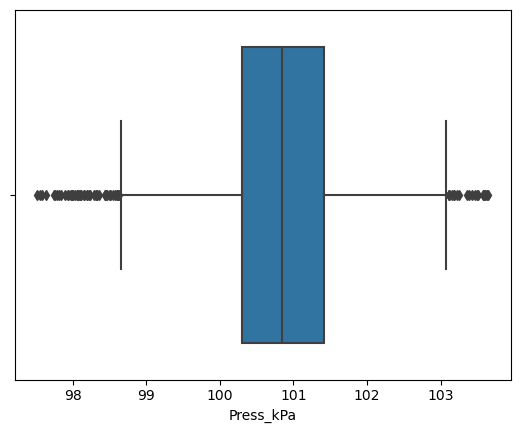

In [844]:
if 'Press_kPa' in weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [845]:
weather_df.loc[(weather_df['Press_kPa']>upper_limit) |(weather_df['Press_kPa']<lower_limit)]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
8050,-10.9,-15.7,68,24,24.1,103.18,Cloudy
8047,-11.3,-14.2,79,24,24.1,103.19,Cloudy
7746,2.6,-7.5,47,9,25.0,103.36,Cloudy
8048,-10.9,-15.3,70,19,24.1,103.23,Cloudy
7742,4.5,-10.6,32,7,48.3,103.39,Cloudy
...,...,...,...,...,...,...,...
8549,-0.9,-1.9,93,35,4.8,98.07,SNOW
8550,-1.6,-3.0,90,41,4.0,98.19,SNOW
8551,-2.2,-3.7,89,35,4.8,98.32,SNOW
8552,-2.5,-4.5,86,41,4.0,98.44,SNOW


In [846]:
#trimming
new_weather_df=weather_df.loc[(weather_df['Press_kPa']<upper_limit) &(weather_df['Press_kPa']>lower_limit)]
print('before removing outliers:',len(weather_df))
print('after removing outliers:',len(new_weather_df))
print(' outliers:',len(weather_df)-len(new_weather_df))

before removing outliers: 2359
after removing outliers: 2289
 outliers: 70


c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


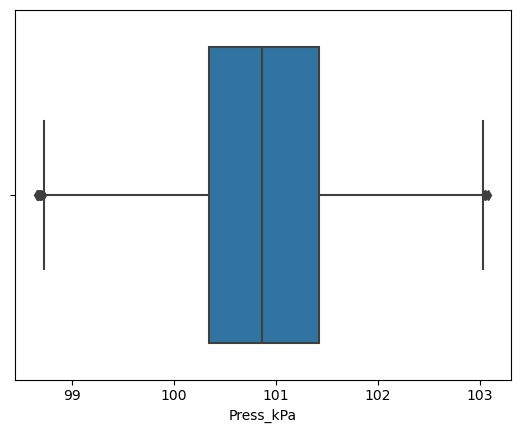

In [847]:
if 'Press_kPa' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [848]:
#capping
new_weather_df=weather_df.copy()
new_weather_df.loc[(new_weather_df['Press_kPa']>upper_limit),'Press_kPa']=upper_limit
new_weather_df.loc[(new_weather_df['Press_kPa']<lower_limit),'Press_kPa']=lower_limit

c:\Users\DELL\.conda\envs\ML3.9\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


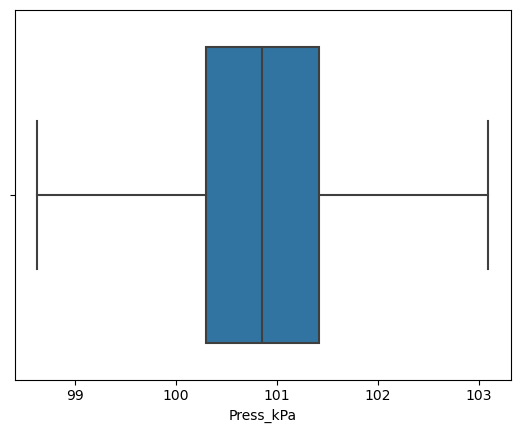

In [849]:
if 'Press_kPa' in new_weather_df.columns:
    # Use sns.boxplot without specifying an index directly
    sns.boxplot(x=new_weather_df['Press_kPa'])
else:
    print("Column 'Press_kPa' not found in the DataFrame.")

In [850]:
new_weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2279,3.6,-4.6,55,19,25.0,100.24,Cloudy
3447,21.6,13.5,60,0,24.1,101.16,Cloudy
7160,5.2,1.5,77,22,48.3,101.94,Cloudy
1486,0.2,-4.2,72,13,25.0,100.49,Cloudy
4188,25.1,9.8,38,13,48.3,100.85,Cloudy


**Label Encoding**

 Converting target variable into numeric values

In [851]:
from sklearn.preprocessing import LabelEncoder

In [852]:
label_Encoder=LabelEncoder()

In [853]:
new_weather_df['Std_Weather']=label_Encoder.fit_transform(new_weather_df['Std_Weather'])

In [854]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [855]:
new_weather_df.head	()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
2279,3.6,-4.6,55,19,25.0,100.24,1
3447,21.6,13.5,60,0,24.1,101.16,1
7160,5.2,1.5,77,22,48.3,101.94,1
1486,0.2,-4.2,72,13,25.0,100.49,1
4188,25.1,9.8,38,13,48.3,100.85,1


In [856]:
new_weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

x,y variables

In [857]:
#Independent variable
X=new_weather_df.drop(['Std_Weather'],axis=1)
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
2279,3.6,-4.6,55,19,25.0,100.24
3447,21.6,13.5,60,0,24.1,101.16
7160,5.2,1.5,77,22,48.3,101.94
1486,0.2,-4.2,72,13,25.0,100.49
4188,25.1,9.8,38,13,48.3,100.85
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [858]:
Y=new_weather_df['Std_Weather']
Y

2279    1
3447    1
7160    1
1486    1
4188    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int32

**Feature Scaling**

In [859]:
from sklearn.preprocessing import StandardScaler

In [860]:
std_scaler=StandardScaler()

In [861]:
X_std=std_scaler.fit_transform(X)
X_std

array([[-0.27726905, -0.59379032, -1.06427819,  0.25385058,  0.11501529,
        -0.66320658],
       [ 1.30905752,  1.13621676, -0.75306336, -1.7577896 ,  0.04553091,
         0.36690866],
       [-0.13626225, -0.01074926,  0.30506705,  0.57147798,  1.91388869,
         1.24026723],
       ...,
       [-0.638599  , -0.29749077,  1.30095449,  1.20673277, -1.44452303,
        -0.98791681],
       [-0.61216022, -0.32616492,  1.05198263,  1.20673277, -1.06621918,
        -1.03270443],
       [-0.59453437, -0.35483907,  0.86525374,  1.41848437, -0.94269139,
        -1.05509824]])

**Splitting Data into training and testing**

In [862]:
from sklearn.model_selection import train_test_split

In [863]:
x_train,x_test,y_train,y_test=train_test_split(X_std,Y,test_size=0.3,random_state=3)

In [864]:
x_train.shape,x_test.shape

((1651, 6), (708, 6))

## **Logistic Regression**

**Building Logistic Regression Model**

In [865]:
from sklearn.linear_model import LogisticRegression

In [866]:
lr_model = LogisticRegression()

In [867]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have your training and testing data as x_train, x_test, y_train, y_test

# Create a logistic regression model
logreg = LogisticRegression()

# Cross-validation
accuracies = cross_val_score(estimator=logreg, X=x_train, y=y_train, cv=10)
print("Cross-validated accuracies:", accuracies)

# Calculate and print the average accuracy and standard deviation
print("Average accuracy:", np.mean(accuracies))
print("Average std:", np.std(accuracies))

# Fit the logistic regression model on the training data
logreg.fit(x_train, y_train)

# Print the test accuracy
test_accuracy = logreg.score(x_test, y_test)
print("Test accuracy:", test_accuracy)


Cross-validated accuracies: [0.62650602 0.64848485 0.61212121 0.55757576 0.64848485 0.62424242
 0.63030303 0.60606061 0.68484848 0.67878788]
Average accuracy: 0.6317415115005476
Average std: 0.03496445328223347
Test accuracy: 0.6115819209039548
